# Welcome to Intro to NLTK!

**This workshop will walk you through the common functions of NLTK in Python!**

Run each chunk in top-to-bottom order and follow along with the code.

I am assuming minimal experience with Python3 and programming in general.

### *Packaged Texts.*
There are two texts packaged with this workshop that provide different levels of challenges: **(1)** Walden by Henry David Thoreau and **(2)** Complete Works of William Shakespeare.

These were downloaded from Project Gutenberg (https://www.gutenberg.org), a website that hosts a library of over 60,000 free books. Many of these books are available in plaintext (.txt) format, making them easilly parsable by packages like NLTK. That said, the skills from this workshop are broadly applicable to any type and format of machine-readable text, not just books from Project Gutenburg and not just plaintext.


## Installing Required Packages
First we will load NLTK into the environment and make sure we can parse text files.

### *Installing NLTK.* 
NLTK is preinstalled on this virtual server, so if you follow this workshop on your own machine, then you will have to install the package on your own. In most cases, this process only takes one line of code and a few minutes. You can find instructions here: https://www.nltk.org/install.html

### *Installing other packages.*
Other packages required in this workshop are **numpy**, **pickle**, **os**, **re**, **string**, **scipy**, and **pyplot**. Like NLTK, they are preinstalled on this server, but if you want to run these scripts on a different machine, you will need to install these packages.


## First Code Chunk: Load NLTK and download popular NLTK packages
The following box is an example of a code chunk! Run it to import (= load) NLTK into the environment. It will take a few minutes and you will see an asterisk (`*`) to the left of the block while it runs.

To run a chunk, you can press the "Run" button above, or hold Shift and press Return/Enter.

In [1]:
#################
## Set up NLTK ##
#################

# Import all functions from NLTK
# This allows us to call nltk functions without specifying the package
from nltk import *

# Download or update popular NLTK packages
# This will let us filter punctuation and common keywords (i.e. stopwords)
download('popular')

# This will allow us to tag tokens in our texts in different ways, including by part of speech
download('tagsets')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/drt1373/nltk_data...
[nltk_data]    |   Package movie_reviews is already

True

## Test our connection to a text file

This code chunk loads the OS package which will help us to load external files, including our texts.

Specifically, we will load the famous American novel 'Walden' into the variable 'file' and use a "for loop" to print the first 20 lines of the novel. This is not a necessary step, but it is a good idea to test the connection to your text file, since problems with file paths are common.

In [2]:
# Import packages
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import special
from nltk import *
from nltk.corpus import stopwords

# The relative path to our text file.
# In other words, where the file is relative to this Jupyter notebook.
pathToFile = 'texts/walden.txt'

# Open Walden and read it (hence the 'r') into the variable 'file'
file = open( pathToFile, 'r')

# This "for loop" will repeat 20 times -- that is what the range() function is doing
# Inside the loop, readline() prints the *next* line, relative to the previous loop.
# So the two lines do a lot. It counts from 0 to 20 and for each count...
for x in range(20):
    
    # ...it prints the next line from our text file
    print( file.readline() )

# This helps matlabplot and jupyter cooperate in showing graphics
%matplotlib inline

                                      1854



                                     WALDEN



                              Or Life In The Woods



                             by Henry David Thoreau

ECONOMY



                             ECONOMY



  WHEN I WROTE the following pages, or rather the bulk of them, I

lived alone, in the woods, a mile from any neighbor, in a house

which I had built myself, on the shore of Walden Pond, in Concord,

Massachusetts, and earned my living by the labor of my hands only. I

lived there two years and two months. At present I am a sojourner in

civilized life again.



  I should not obtrude my affairs so much on the notice of my

readers if very particular inquiries had not been made by my



## Why use Python (versus other languages)?
**In my experience, people tend to prefer Python for text processing and analysis over other programming languages like R, Ruby, Matlab, and others.**

While programming languages are designed to be general purpose, there are more packages and resources for text-related tasks than practically any other language. This means that if you want to do some online data mining, work with gigantic corpora, or custom semantic tagging systems (say, for happy versus sad words), you can do all of this *and* the analysis in the same language. Take the example of data mining. You could:

<ol>
    <li>Use the <code>BeautifulSoup</code> package to scrape a list of webpages and parse them into plaintext.</li>
    <li>With regular expressions (regex), <code>nltk</code>, and the <code>string</code> package you can clean the plaintext, tokenize it, create frequency distributions and ngram models.</li>
    <li><code>pandas</code> is good for data analyis tasks for the statistics that come out of NLTK.</li>
    <li>You can even train a "deep learning" neural network based on text data without leaving Python, thanks to <code>PyTorch</code></li>
</ol>

There's also the fact that Python is widely known compared to R and Matlab, which are other languages that can do "all of the above" when it comes to text analysis.


# Text Cleaning

**In this Python script, we will clean the data.**

This means we will *filter* and *transform* the data to include only the elements of interest, and we will return it in a format that makes it easy to analyze later.

**Goals**
<ol>
    <li> Tokenize the text into words </li>
    <li> Remove punctuation and uninformative words </li>
    <li> Convert all words to lowercase </li>
    <li> Read a frequency distribution </li>
</ol>

## Tokenize text

Tokenization is the process of breaking down a big text into units of interest, usually words.

But, what is a word?  This might seem like a weird question, but consider the example "black sheep", defined by the Cambridge English Dictionary below:

>*Someone who embarrasses a group or family because the person is different or has gotten into trouble.*

Based on this, you might say that the 'sheep' in 'black sheep' is different than the 'sheep' in the phrase 'my pet sheep', and you have the beginnings of a good argument that 'black sheep' is one word, not two.

> NLTK (and most text analytics tools) will tokenize "my black sheep uncle owns a black cat" as `['my', 'black', 'sheep', 'uncle', 'owns', 'a', 'black', 'cat']`. **We have a hunch that this is wrong, but whether it matters for your analysis is up to you.**

For the purposes of today, we will ignore these kinds of issues, but you should keep in mind that NLTK is built to work for most purposes, not necessarilly your purposes. Before you begin any text analysis project or experiment, you must first define exactly what kind of elements you are interested in, so you can identify those in continuous text.

Generally, without more information, a tokenizer will usually split a text into tokens based on spaces and punctuation, a strategy that works for most words.

>**Run the code chunk below to see how NLTK tokenizes Walden using its default settings.**

In [3]:
#################################
## Read-in and tokenize Walden ##
#################################

# Read the Walden file
walden_raw = file.read( )

# Tokenize 'text' with the NLTK function word_tokenize() and save the result to the variable 'tokens'
tokens = word_tokenize( walden_raw )

# Print the result of the tokenization
print( tokens )

# Close the Walden text file to release it from memory
# We don't need the original text anymore.
file.close()



['townsmen', 'concerning', 'my', 'mode', 'of', 'life', ',', 'which', 'some', 'would', 'call', 'impertinent', ',', 'though', 'they', 'do', 'not', 'appear', 'to', 'me', 'at', 'all', 'impertinent', ',', 'but', ',', 'considering', 'the', 'circumstances', ',', 'very', 'natural', 'and', 'pertinent', '.', 'Some', 'have', 'asked', 'what', 'I', 'got', 'to', 'eat', ';', 'if', 'I', 'did', 'not', 'feel', 'lonesome', ';', 'if', 'I', 'was', 'not', 'afraid', ';', 'and', 'the', 'like', '.', 'Others', 'have', 'been', 'curious', 'to', 'learn', 'what', 'portion', 'of', 'my', 'income', 'I', 'devoted', 'to', 'charitable', 'purposes', ';', 'and', 'some', ',', 'who', 'have', 'large', 'families', ',', 'how', 'many', 'poor', 'children', 'I', 'maintained', '.', 'I', 'will', 'therefore', 'ask', 'those', 'of', 'my', 'readers', 'who', 'feel', 'no', 'particular', 'interest', 'in', 'me', 'to', 'pardon', 'me', 'if', 'I', 'undertake', 'to', 'answer', 'some', 'of', 'these', 'questions', 'in', 'this', 'book', '.', 'In',

### Assessing the tokenization

Take a minute to look through the tokens that NLTK found. Is there anything there that might get in the way of an analysis of the text?


## Filtering non-alphabetical characters

Filtering in NLTK usually entails comparing elements between lists. For example, if we want to see whether a particular token (usually equivalent to the idea of word) includes characters outside of the alphabet, we would compare each character to a list of all the letters in the alphabet (uppercase and lowercase).

This is the function of NLTK's `isalpha()`.

>**In the next code chunk we find the 100 most frequent tokens that include characters outside of the alphabet.** This will help us determine whether we should filter non-alphabetical characters. Follow along with the comments in the code to learn more about each step of the process.


In [4]:
##################################################
## Find tokens with characters that are not A-Z ##
##################################################

# Compare each token in Walden to the alphabet, returning when the token includes non-alphabetical characters
notalpha = [ token for token in tokens if not token.isalpha() ]

# Count the frequency of each token.
# Answers the question, How many times does each token appear across the corpus?
# Save the result to the 'freqs' variable
freqs = FreqDist(notalpha)

# Print the 100 most frequent tokens with non-alphabetical characters
print( freqs.most_common(100) )

[(',', 8494), ('.', 3359), (';', 953), ('...', 422), ("''", 282), ("'s", 259), ('?', 253), ('``', 252), ('!', 154), ('-', 59), ('(', 45), (')', 45), (':', 35), ("'", 33), ('$', 20), ('..', 14), ('1/2', 14), ('--', 14), ('it-', 12), ('twenty-five', 9), ('a-fishing', 8), ('so-called', 7), ('man-', 6), ('etc.', 6), ('wood-pile', 6), ('Mr.', 6), ('3/4', 6), ("n't", 6), ('him-', 6), ('&', 5), ("o'clock", 5), ('bean-field', 5), ('well-nigh', 4), ('St.', 4), ("man's", 4), ('1845', 4), ('14.72', 4), ('them-', 4), ('me-', 4), ('whip-poor-will', 4), ('post-office', 4), ('snow-crust', 4), ('well-known', 3), ('dwelling-house', 3), ('family-', 3), ('ninety-seven', 3), ('1st', 3), ('looking-glass', 3), ('all-', 3), ('second-hand', 3), ('23.44', 3), ('fire-', 3), ('half-hour', 3), ('winter-', 3), ('meeting-house', 3), ('divining-rod', 3), ('snow-storm', 3), ('cart-path', 3), ('bor-r-r-r-n', 3), ('tr-r-r-oonk', 3), ('bar-room', 3), ("'52", 3), ('mud-turtle', 3), ('water-fowl', 3), ('sweet-scented', 3)

### So, should we apply the filter to remove tokens with non-alphabetical characters?

**It looks like there are a few kinds of tokens here**, all of which would be removed from our dataset if we filtered using `isalpha()`:
<ul>
    <li> Punctuation (i.e. commas, which appear 8484 times) </li>
    <li> Numbers (i.e. '1.73', which appears twice) </li>
    <li> Hypenated words (i.e. 'so-called', which appears 7 times) </li>
</ul>

For the purposes of this workshop, let's assume we want to remove all of these tokens from our data. But you might want to give a little bit of thought about how we can possibly filter the text before tokenizing it to save more tokens from unnecessary filtering.

>**The next code chunk removes tokens that include non-alphabetical characters.**

In [5]:
####################################################
## Remove tokens with characters that are not A-Z ##
####################################################

# Read the list of tokens and only return each token if it's all alphabetical
# We write the result to a new variable, tokens_clean, which we will overwrite until it's cleaned.
tokens_clean = [ token for token in tokens if token.isalpha() ]


print(tokens_clean)

['townsmen', 'concerning', 'my', 'mode', 'of', 'life', 'which', 'some', 'would', 'call', 'impertinent', 'though', 'they', 'do', 'not', 'appear', 'to', 'me', 'at', 'all', 'impertinent', 'but', 'considering', 'the', 'circumstances', 'very', 'natural', 'and', 'pertinent', 'Some', 'have', 'asked', 'what', 'I', 'got', 'to', 'eat', 'if', 'I', 'did', 'not', 'feel', 'lonesome', 'if', 'I', 'was', 'not', 'afraid', 'and', 'the', 'like', 'Others', 'have', 'been', 'curious', 'to', 'learn', 'what', 'portion', 'of', 'my', 'income', 'I', 'devoted', 'to', 'charitable', 'purposes', 'and', 'some', 'who', 'have', 'large', 'families', 'how', 'many', 'poor', 'children', 'I', 'maintained', 'I', 'will', 'therefore', 'ask', 'those', 'of', 'my', 'readers', 'who', 'feel', 'no', 'particular', 'interest', 'in', 'me', 'to', 'pardon', 'me', 'if', 'I', 'undertake', 'to', 'answer', 'some', 'of', 'these', 'questions', 'in', 'this', 'book', 'In', 'most', 'books', 'the', 'I', 'or', 'first', 'person', 'is', 'omitted', 'in

## Converting text to lowercase

**NLTK considers "Amber" and "amber" to be different tokens.** While it might be useful to make a distinction between these tokens (for example, for identifying some proper names), usually we choose to make all characters lowercase.

We can convert all of the text into lowercase by passing each token using the `lower()` function. There are more nuanced ways to do this, such as by separating capitalization at the beginning of sentences versus within sentences, that might be more appropriate for your data. You will see an example of this selective transformat

>**For our puposes, we will just convert all tokens to lowercase in the next code chunk.**

In [6]:
#################################
## Convert tokens to lowercase ##
#################################

# Use another list comprehension to save the lowercase version to tokens_clean (overwriting the original)
tokens_clean = [ token.lower() for token in tokens_clean ]

# Print the result
print( tokens_clean )


['townsmen', 'concerning', 'my', 'mode', 'of', 'life', 'which', 'some', 'would', 'call', 'impertinent', 'though', 'they', 'do', 'not', 'appear', 'to', 'me', 'at', 'all', 'impertinent', 'but', 'considering', 'the', 'circumstances', 'very', 'natural', 'and', 'pertinent', 'some', 'have', 'asked', 'what', 'i', 'got', 'to', 'eat', 'if', 'i', 'did', 'not', 'feel', 'lonesome', 'if', 'i', 'was', 'not', 'afraid', 'and', 'the', 'like', 'others', 'have', 'been', 'curious', 'to', 'learn', 'what', 'portion', 'of', 'my', 'income', 'i', 'devoted', 'to', 'charitable', 'purposes', 'and', 'some', 'who', 'have', 'large', 'families', 'how', 'many', 'poor', 'children', 'i', 'maintained', 'i', 'will', 'therefore', 'ask', 'those', 'of', 'my', 'readers', 'who', 'feel', 'no', 'particular', 'interest', 'in', 'me', 'to', 'pardon', 'me', 'if', 'i', 'undertake', 'to', 'answer', 'some', 'of', 'these', 'questions', 'in', 'this', 'book', 'in', 'most', 'books', 'the', 'i', 'or', 'first', 'person', 'is', 'omitted', 'in

## Frequency distributions

The most common word in English is "the", which makes it not very informative. Words like this are known as "stopwords", and removing them from a corpus is a normal part of text analysis. Before we remove the stopwords, let's look at the most common words in Walden and see how stopwords might obscure more important words.

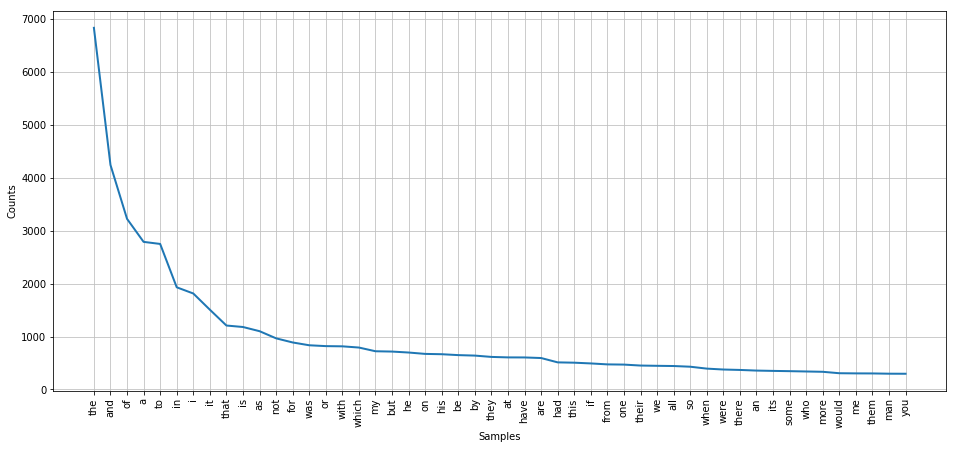

[('the', 6831),
 ('and', 4241),
 ('of', 3223),
 ('a', 2788),
 ('to', 2749),
 ('in', 1930),
 ('i', 1813),
 ('it', 1507),
 ('that', 1208),
 ('is', 1180),
 ('as', 1101),
 ('not', 966),
 ('for', 888),
 ('was', 835),
 ('or', 819),
 ('with', 815),
 ('which', 792),
 ('my', 722),
 ('but', 716),
 ('he', 698),
 ('on', 672),
 ('his', 666),
 ('be', 649),
 ('by', 640),
 ('they', 615),
 ('at', 606),
 ('have', 605),
 ('are', 594),
 ('had', 512),
 ('this', 506),
 ('if', 492),
 ('from', 474),
 ('one', 470),
 ('their', 452),
 ('we', 447),
 ('all', 443),
 ('so', 430),
 ('when', 394),
 ('were', 377),
 ('there', 369),
 ('an', 357),
 ('its', 351),
 ('some', 346),
 ('who', 340),
 ('more', 334),
 ('would', 307),
 ('me', 304),
 ('them', 303),
 ('man', 298),
 ('you', 297)]

In [7]:
#############################################
## Generate a token frequency distribution ##
#############################################

# This line specifies the size of the figure as out Jupyter Notebook will print it
plt.rcParams["figure.figsize"] = [16,7]

# Calculate the frequency for each token from the book and save it to the variable 'frequencies'
frequencies = FreqDist( tokens_clean )

# Call 'frequencies' with the method 'plot' to generate a frequency plot of the 50 most frequent words
walden_plot = frequencies.plot( 50 )

# The line above saves the plot to the variable 'walden_plot'. This line outputs it, so it will appear below.
walden_plot

# Also print the raw list
frequencies.most_common(50)

## Removing stopwords

One implication for this is that **most of the tokens in our dataset are not informative** because most of the high-frequency tokens in Walden are high frequency in every other English text. If we want to learn more about Walden, then we need to focus on lower frequency tokens.

In other words, if we followed every step in this tutorial so far with a different text, the result would likely be exactly the same. If we are asking questions about English in general this might be useful, but instead of settling for this general dataset, we will remove the most common tokens to make our data more representative of Walden.

Luckily, NLTK has many premade lists of very common tokens, and we already installed the lists! If you want to see it, just run the line `set(stopwords.words('english'))`.

>**The next code block removes stopwords. This step looks a lot like filtering we did on non-alphabetical tokens.**


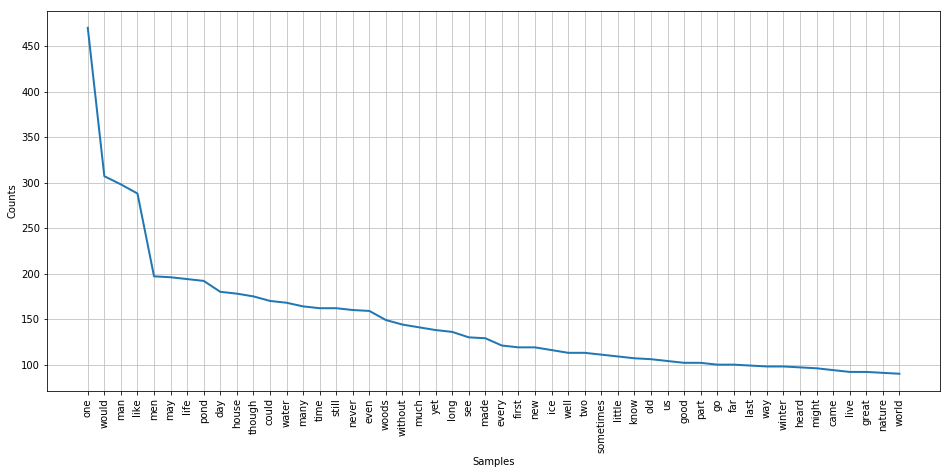

[('one', 470),
 ('would', 307),
 ('man', 298),
 ('like', 288),
 ('men', 197),
 ('may', 196),
 ('life', 194),
 ('pond', 192),
 ('day', 180),
 ('house', 178),
 ('though', 175),
 ('could', 170),
 ('water', 168),
 ('many', 164),
 ('time', 162),
 ('still', 162),
 ('never', 160),
 ('even', 159),
 ('woods', 149),
 ('without', 144),
 ('much', 141),
 ('yet', 138),
 ('long', 136),
 ('see', 130),
 ('made', 129),
 ('every', 121),
 ('first', 119),
 ('new', 119),
 ('ice', 116),
 ('well', 113),
 ('two', 113),
 ('sometimes', 111),
 ('little', 109),
 ('know', 107),
 ('old', 106),
 ('us', 104),
 ('good', 102),
 ('part', 102),
 ('go', 100),
 ('far', 100),
 ('last', 99),
 ('way', 98),
 ('winter', 98),
 ('heard', 97),
 ('might', 96),
 ('came', 94),
 ('live', 92),
 ('great', 92),
 ('nature', 91),
 ('world', 90)]

In [8]:
######################
## Remove stopwords ##
######################

# Bigger figure
plt.rcParams["figure.figsize"] = [16,7]

# Check every token in 'tokens_clean' against the NLTK stopword list
# Only keep tokens NOT in the list
tokens_clean = [t for t in tokens_clean if not t in set(stopwords.words('english'))]

# Generate a new frequency distribution plot with the 50 most frequent words remaining after filtering
# This follows the same steps as before: We count the frequency of each token, we generate a plot of the top 50, and then we display them.
frequencies = FreqDist( tokens_clean )

# Make plot with top 50 tokens
walden_plot = frequencies.plot( 50 )

# Show the plot
walden_plot

# Also print the raw list
frequencies.most_common(50)

## Cleaning is time consuming and imperfect

**As you can tell from the words in the plot above, we now have a fairly clean and informative data set!**

For example, we can tell just by looking at this that Walden may have a lot to do with the natural world (water, pond, ice, winter, nature, world) and was perhaps about a man living in nature (man, men, time, house).

Of course, there are other frequent tokens that might provide less information for your analysis (would, may, though, two, us). You can either filter these words out using *lists*, as we did above for non-alphabetical tokens and for stopwords, *or* you can filter our entire classes of words (i.e. pronouns) from your analysis. This will be detailed in the next section.

First we will save our progress in the **pickle format**, which is an efficient way to store raw data in Python.

In [9]:
#######################
## Save our progress ##
#######################

# Write the tokens list to the /working/ folder
with open('working/walden_clean_tokens.pkl', 'wb') as f:
    pickle.dump( tokens_clean, f )

# Also write a Text object (unique to NLTK) to the /working/ folder 
with open('working/walden_text.pkl', 'wb') as f:
    pickle.dump( Text( tokens ), f )
    
# Also write the text to the /working/ folder 
with open('working/walden_raw.pkl', 'wb') as f:
    pickle.dump( walden_raw, f )
    